<div dir = "rtl" style="direction:rtl;line-height:300%;">
    <font face="XB Zar" size=6 color=#F32500>
        <div  align=center>
            تمرین هفته دوازدهم بوت کمپ یادگیری ماشین-
            مپصا
        </div>
        <br/>
    </font>
</div>

In [1]:
# import all packages and libraries here.
import numpy as np
import pandas as pd

# 1- State with reasons whether the following sentences are true or false?

<ul style="font-size:25px">
    <li>
        SVMs are not suitable for large datasets.
    </li>
    <li>
       SVMs perform poorly in imbalanced datasets.
    </li>
     <li>
        SVMs perform poorly when there is just too much noise in the data.
    </li>
</ul>

<div id="bayes" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=6>
		 ۲- دیتاست lsvt-voice-rehabilitation را از لینک زیر دانلود کنید و به سوالات زیر حواب دهید. در این تمرین مجاز به استفاده از کتابخانه scikit-learn می باشید.
		</br>
</div>
		https://archive.ics.uci.edu/ml/datasets/LSVT+Voice+Rehabilitation

<div id="bayes" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=6>
		 الف- داده ها را به روشهای زیر دسته بندی کنید (حواستان باشد که داده ها را قبل از اعمال به مدل، نرمالایز کنید).
        <ul>
            <li>
            کرنل خطی
            </li>
            <li>
            کرنل چندجمله ای (پارامترهای r, d)
            </li>
            <li>
            کرنل rbf - پارامتر گاما
            </li>
            <li>
            سیگمویید - پارامتر r
            </li>           
         </ul>
</div

In [3]:
df_data = pd.read_excel('LSVT_voice_rehabilitation.xlsx', sheet_name='Data')
df_response = pd.read_excel('LSVT_voice_rehabilitation.xlsx', sheet_name='Binary response')
df_subject = pd.read_excel('LSVT_voice_rehabilitation.xlsx', sheet_name='Subject demographics')

In [4]:
df = pd.concat([df_data, df_response, df_subject], axis=1)

In [5]:
cols= df.columns.tolist()
# cols

In [6]:
df.isna().sum()

Jitter->F0_abs_dif                           0
Jitter->F0_dif_percent                       0
Jitter->F0_PQ5_classical_Schoentgen          0
Jitter->F0_PQ5_classical_Baken               0
Jitter->F0_PQ5_generalised_Schoentgen        0
                                            ..
det_TKEO_std4_10_coef                        0
Binary class 1=acceptable, 2=unacceptable    0
Subject_index                                0
Age                                          0
Gender, 0->Male, 1->Female                   0
Length: 314, dtype: int64

In [7]:
X = df.drop('Binary class 1=acceptable, 2=unacceptable', axis=1)
y = df['Binary class 1=acceptable, 2=unacceptable'].copy()

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

### linear kernel

In [10]:
svc_linear = SVC(kernel='linear')

model_svc_linear = make_pipeline(StandardScaler(), svc_linear)

In [11]:
model_svc_linear.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [12]:
y_predict_svm_linear = model_svc_linear.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

In [14]:
y_predict_svm_linear = model_svc_linear.predict(X_test)

print('accuracy for linear kernel : ', accuracy_score(y_predict_svm_linear, y_test))
print('f_1 score for linear kernel : ', f1_score(y_predict_svm_linear, y_test))
print(confusion_matrix(y_test, y_predict_svm_linear))

accuracy for linear kernel :  0.78125
f_1 score for linear kernel :  0.72
[[ 9  0]
 [ 7 16]]


### Polynomial Kernel (degree = 2, 3, 4)

In [15]:
# Degree = 2

In [16]:
svc_poly_d2 = SVC(kernel='poly', degree=2)

model_svc_poly_d2 = make_pipeline(StandardScaler(), svc_poly_d2)

In [17]:
model_svc_poly_d2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(degree=2, kernel='poly'))])

In [18]:
y_predict_svm_poly_d2 = model_svc_poly_d2.predict(X_test)

print('accuracy for polynomial kernel, Degree = 2 : ', accuracy_score(y_predict_svm_poly_d2, y_test))
print('f_1 score for polynomial kernel, Degree = 2 : ', f1_score(y_predict_svm_poly_d2, y_test))
print(confusion_matrix(y_test, y_predict_svm_poly_d2))

accuracy for polynomial kernel, Degree = 2 :  0.625
f_1 score for polynomial kernel, Degree = 2 :  0.0
[[ 0  9]
 [ 3 20]]


In [19]:
# Degree = 3

In [19]:
svc_poly_d3 = SVC(kernel='poly', degree=3)

model_svc_poly_d3 = make_pipeline(StandardScaler(), svc_poly_d3)
model_svc_poly_d3.fit(X_train, y_train)

y_predict_svm_poly_d3 = model_svc_poly_d3.predict(X_test)

print('accuracy for polynomial kernel, Degree = 3 : ', accuracy_score(y_test, y_predict_svm_poly_d3))
print('f_1 score for polynomial kernel, Degree = 3 : ', f1_score(y_test, y_predict_svm_poly_d3))
print(confusion_matrix(y_predict_svm_poly_d3, y_test))

accuracy for polynomial kernel, Degree = 3 :  0.625
f_1 score for polynomial kernel, Degree = 3 :  0.0
[[ 0  3]
 [ 9 20]]


In [21]:
# Degree = 4

In [22]:
svc_poly_d4 = SVC(kernel='poly', degree=4)

model_svc_poly_d4 = make_pipeline(StandardScaler(), svc_poly_d4)
model_svc_poly_d4.fit(X_train, y_train)

y_predict_svm_poly_d4 = model_svc_poly_d4.predict(X_test)

print('accuracy for polynomial kernel, Degree = 4 : ', accuracy_score(y_predict_svm_poly_d4, y_test))
print('f_1 score for polynomial kernel, Degree = 4 : ', f1_score(y_predict_svm_poly_d4, y_test))
print(confusion_matrix(y_predict_svm_poly_d4, y_test))

accuracy for polynomial kernel, Degree = 4 :  0.625
f_1 score for polynomial kernel, Degree = 4 :  0.0
[[ 0  3]
 [ 9 20]]


### rbf kernel (gamma= scale, auto, 0.1)

In [23]:
# gamma = scale

In [20]:
svc_rbf_g1 = SVC(kernel='rbf', gamma='scale')

model_rbf_g1 = make_pipeline(StandardScaler(), svc_rbf_g1)
model_rbf_g1.fit(X_train, y_train)

y_predict_rbf_g1 = model_rbf_g1.predict(X_test)

print('accuracy for rbf kernel, gamma = scale : ', accuracy_score(y_test, y_predict_rbf_g1))
print('f_1 score for rbf kernel, gamma = sclae : ', f1_score(y_test, y_predict_rbf_g1))
print(confusion_matrix(y_predict_rbf_g1, y_test))

accuracy for rbf kernel, gamma = scale :  0.9375
f_1 score for rbf kernel, gamma = sclae :  0.8750000000000001
[[ 7  0]
 [ 2 23]]


In [25]:
# gamma = auto

In [26]:
svc_rbf_g2 = SVC(kernel='rbf', gamma='auto')

model_rbf_g2 = make_pipeline(StandardScaler(), svc_rbf_g2)
model_rbf_g2.fit(X_train, y_train)

y_predict_rbf_g2 = model_rbf_g2.predict(X_test)

print('accuracy for rbf kernel, gamma = auto : ', accuracy_score(y_predict_rbf_g2, y_test))
print('f_1 score for rbf kernel, gamma = auto : ', f1_score(y_predict_rbf_g2, y_test))
print(confusion_matrix(y_predict_rbf_g2, y_test))

accuracy for rbf kernel, gamma = auto :  0.9375
f_1 score for rbf kernel, gamma = auto :  0.8750000000000001
[[ 7  0]
 [ 2 23]]


In [27]:
# gamma = 0.1

In [28]:
svc_rbf_g3 = SVC(kernel='rbf', gamma=0.1)

model_rbf_g3 = make_pipeline(StandardScaler(), svc_rbf_g3)
model_rbf_g3.fit(X_train, y_train)

y_predict_rbf_g3 = model_rbf_g3.predict(X_test)

print('accuracy for rbf kernel, gamma = 0.1 : ', accuracy_score(y_predict_rbf_g3, y_test))
print('f_1 score for rbf kernel, gamma = 0.1 : ', f1_score(y_predict_rbf_g3, y_test))
print(confusion_matrix(y_predict_rbf_g3, y_test))

accuracy for rbf kernel, gamma = 0.1 :  0.71875
f_1 score for rbf kernel, gamma = 0.1 :  0.0
[[ 0  0]
 [ 9 23]]


In [29]:
# gamma = 1

In [30]:
svc_rbf_g4 = SVC(kernel='rbf', gamma=1)

model_rbf_g4 = make_pipeline(StandardScaler(), svc_rbf_g4)
model_rbf_g4.fit(X_train, y_train)

y_predict_rbf_g4 = model_rbf_g4.predict(X_test)

print('accuracy for rbf kernel, gamma = 1 : ', accuracy_score(y_predict_rbf_g4, y_test))
print('f_1 score for rbf kernel, gamma = 1 : ', f1_score(y_predict_rbf_g4, y_test))
print(confusion_matrix(y_predict_rbf_g4, y_test))

accuracy for rbf kernel, gamma = 1 :  0.71875
f_1 score for rbf kernel, gamma = 1 :  0.0
[[ 0  0]
 [ 9 23]]


### sigmoid kernel 

In [31]:
# C=1 , gamma=scale

In [32]:
svc_sigmoid_1 = SVC(kernel='sigmoid', C=1, gamma='scale')

model_sigmoid_1 = make_pipeline(StandardScaler(), svc_sigmoid_1)
model_sigmoid_1.fit(X_train, y_train)

y_predict_signoid_1 = model_sigmoid_1.predict(X_test)

print('accuracy for sigmoid kernel, C=1 , gamma = scale : ', accuracy_score(y_predict_signoid_1, y_test))
print('f_1 score for sigmoid kernel, C=1 , gamma = scale : ', f1_score(y_predict_signoid_1, y_test))
print(confusion_matrix(y_predict_signoid_1, y_test))

accuracy for sigmoid kernel, C=1 , gamma = scale :  0.875
f_1 score for sigmoid kernel, C=1 , gamma = scale :  0.7777777777777778
[[ 7  2]
 [ 2 21]]


In [33]:
# C=0.1 , gamma=scale

In [34]:
svc_sigmoid_2 = SVC(kernel='sigmoid', C=0.1, gamma='scale')

model_sigmoid_2 = make_pipeline(StandardScaler(), svc_sigmoid_2)
model_sigmoid_2.fit(X_train, y_train)

y_predict_signoid_2 = model_sigmoid_2.predict(X_test)

print('accuracy for sigmoid kernel, C=0.1 , gamma = scale : ', accuracy_score(y_predict_signoid_2, y_test))
print('f_1 score for sigmoid kernel, C=0.1 , gamma = scale : ', f1_score(y_predict_signoid_2, y_test))
print(confusion_matrix(y_predict_signoid_2, y_test))

accuracy for sigmoid kernel, C=0.1 , gamma = scale :  0.71875
f_1 score for sigmoid kernel, C=0.1 , gamma = scale :  0.0
[[ 0  0]
 [ 9 23]]


In [35]:
# C=0.1 , gamma=1

In [36]:
svc_sigmoid_3 = SVC(kernel='sigmoid', C=0.1, gamma=1)

model_sigmoid_3 = make_pipeline(StandardScaler(), svc_sigmoid_3)
model_sigmoid_3.fit(X_train, y_train)

y_predict_signoid_3 = model_sigmoid_3.predict(X_test)

print('accuracy for sigmoid kernel, C=0.1 , gamma = 1 : ', accuracy_score(y_predict_signoid_3, y_test))
print('f_1 score for sigmoid kernel, C=0.1 , gamma = 1 : ', f1_score(y_predict_signoid_3, y_test))
print(confusion_matrix(y_predict_signoid_3, y_test))

accuracy for sigmoid kernel, C=0.1 , gamma = 1 :  0.78125
f_1 score for sigmoid kernel, C=0.1 , gamma = 1 :  0.631578947368421
[[ 6  4]
 [ 3 19]]


<div id="bayes" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=6>
		 ب- معیار دقت و f1 را برای هریک از دسته بندی های قسمت الف به دست آورید. (برای هر یک از پارامترهای گفته شده حداقل سه مقدار مختلف در نظر بگیرید)
		</br>
</div>

<div id="bayes" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=6>
		 ج- تاثیر پارامترهای هر کرنل را بر کارآیی مدل ها تحلیل کنید.
		</br>
</div>

#### finding the best model using GridSearch

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
hyper_params = {
    'svc__degree' : [1,2],
    'svc__gamma' : ['scale', 0.1, 1],
    'svc__C' : [1,0.1,10],
    'svc__kernel' : ['poly', 'rbf', 'sigmoid']
}
svc_model = make_pipeline(StandardScaler(), SVC())
# svc_poly.get_params()
svc_model_tuned = GridSearchCV(svc_model, param_grid=hyper_params, scoring='accuracy', cv=3)
svc_model_tuned.fit(X_train, y_train)
# print(svc_model_tuned.best_params_)
y_model_params_predict = svc_model_tuned.predict(X_test)
print('accuracy : ',accuracy_score(y_model_params_predict, y_test))
print('best params: ', svc_model_tuned.best_params_)

accuracy :  0.84375
best params:  {'svc__C': 10, 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


<div id="bayes" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=6>
		 د- کدام مدل عملکرد بهتری دارد؟ چرا؟
		</br>
</div>

In [39]:
# the grid search above confirms 'rbf' kerel as the best kernel among 'linear', 'poly', 'rbf' and 'sigmoid'
# manually we got same result

In [40]:
# 'rbf' shows the best performance, possibaly because there are overlapping data
# 'rbf' considers the square of the difference of the pairs of the data so it deals with overlapped data better.

### feature selection & reduction

In [71]:
# no of columns are greater than no of rows, so the data needs feature reduction to have proper modelling.

In [77]:
# to make the notebook more readable. feature selection and reduction is done in a seperate file

# 3- Student Intervention System

<div style="margin-left: 10px;font-size:25px">a) Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, 'passed', will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.</div>

In [41]:
student_data = pd.read_csv("student_data.csv")
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


<div style="margin-left: 10px;font-size:25px">
  <p>  
b) Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
    </p>
    <ul>
        <li>The total number of students, n_students.</li>
        <li>The total number of features for each student, n_features.</li>
        <li>The number of those students who passed, n_passed.</li>
        <li>The number of those students who failed, n_failed.</li>
        <li>The graduation rate of the class, grad_rate, in percent (%).</li>
     </ul>

</div>

In [42]:
student_data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object

In [43]:
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [44]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [45]:
student_data.passed.unique()

array(['no', 'yes'], dtype=object)

In [46]:
# TODO: Calculate number of students

n_students = len(student_data)

# TODO: Calculate number of features
n_features = len(student_data.columns)

# TODO: Calculate passing students
n_passed = len(student_data.loc[student_data['passed'] == 'yes'])

# TODO: Calculate failing students
n_failed = len(student_data.loc[student_data['passed'] == 'no'])

# TODO: Calculate graduation rate
grad_rate = n_passed/(n_passed + n_failed)

# Print the results
print("Total number of students: {}".format(n_students))
print("Number of features: {}".format(n_features))
print("Number of students who passed: {}".format(n_passed))
print("Number of students who failed: {}".format(n_failed))
print("Graduation rate of the class: {:.2f}%".format(grad_rate))

Total number of students: 395
Number of features: 31
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 0.67%


<div style="margin-left: 10px;font-size:25px">
    <p>c) Preparing the Data</p>
    <p>In this section, we will prepare the data for modeling, training and testing.</p>
    <p>Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.</p>
</div>




In [47]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print("Feature columns:\n{}".format(feature_cols))
print("\nTarget column: {}".format(target_col))

# Separate the data into feature data and target data (X_all and y_all, respectively)
X = student_data[feature_cols]
y = student_data[target_col]

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed


<div style="margin-left: 10px;font-size:25px">
    <p>d) Preprocess Feature Columns</p>
    <p>As you can see, there are several non-numeric columns that need to be converted! Many of them are simply yes/no, e.g. internet. These can be reasonably converted into 1/0 (binary) values.</p>
    <p>
Other columns, like Mjob and Fjob, have more than two values, and are known as categorical variables. The recommended way to handle such a column is to create as many columns as possible values (e.g. Fjob_teacher, Fjob_other, Fjob_services, etc.), and assign a 1 to one of them and 0 to all others.

These generated columns are sometimes called dummy variables, and we will use the pandas.get_dummies() function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.</p>
</div>


In [48]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.items():

        # If data type is non-numeric, replace all binary values with 1/0
        if col_data.dtype == object and len(col_data.unique()) == 2:
            print("*****binary*****")
            print("col name: ", col, end="----")
            col_data_unique = col_data.unique()
            print("unique values: ", col_data_unique)
            col_data = col_data.replace(col_data_unique, [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object and len(col_data.unique()) != 2:
            print("*****categorical*****")
            print("col name: ", col, end="----")
            col_data_unique = col_data.unique()
            print("unique values: ", col_data_unique)
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_preprocessed = preprocess_features(X)

*****binary*****
col name:  school----unique values:  ['GP' 'MS']
*****binary*****
col name:  sex----unique values:  ['F' 'M']
*****binary*****
col name:  address----unique values:  ['U' 'R']
*****binary*****
col name:  famsize----unique values:  ['GT3' 'LE3']
*****binary*****
col name:  Pstatus----unique values:  ['A' 'T']
*****categorical*****
col name:  Mjob----unique values:  ['at_home' 'health' 'other' 'services' 'teacher']
*****categorical*****
col name:  Fjob----unique values:  ['teacher' 'other' 'services' 'health' 'at_home']
*****categorical*****
col name:  reason----unique values:  ['course' 'other' 'home' 'reputation']
*****categorical*****
col name:  guardian----unique values:  ['mother' 'father' 'other']
*****binary*****
col name:  schoolsup----unique values:  ['yes' 'no']
*****binary*****
col name:  famsup----unique values:  ['no' 'yes']
*****binary*****
col name:  paid----unique values:  ['no' 'yes']
*****binary*****
col name:  activities----unique values:  ['no' 'yes']


<div style="margin-left: 10px;font-size:25px">
    <p>e) Training and Testing Data Split</p>
    <p>split the data (both features and corresponding labels) into training and test sets.(Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).)</p>
</div>

In [49]:
# detecting columns which the values type are int and float but they are categotial
# nunique < 10

arithmetic = []
for col in X_train.select_dtypes(include=['number']):
    if X_train.select_dtypes(include=['number'])[col].nunique() < 10:
        arithmetic.append(col)

/home/adel/ml/assignments/myenv/lib/python3.10/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


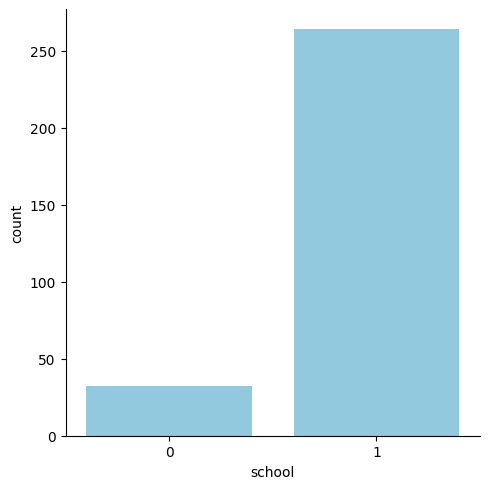

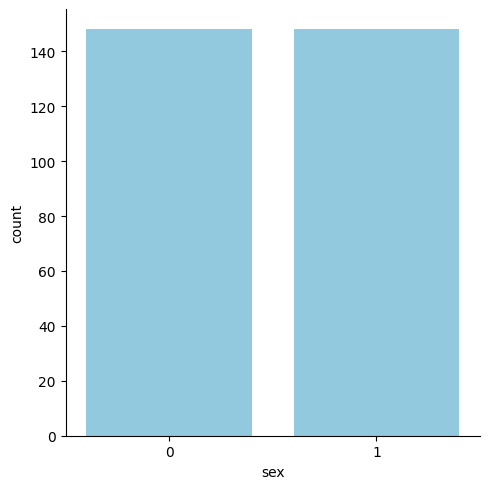

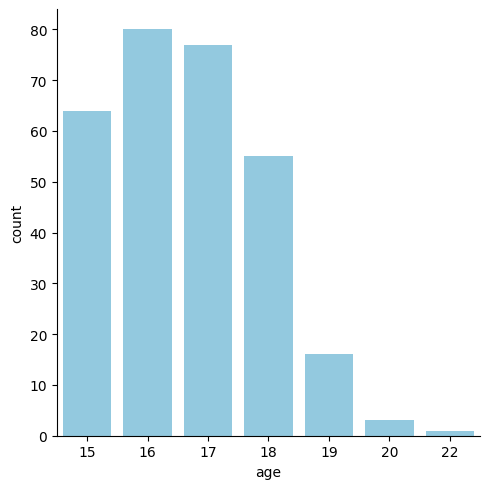

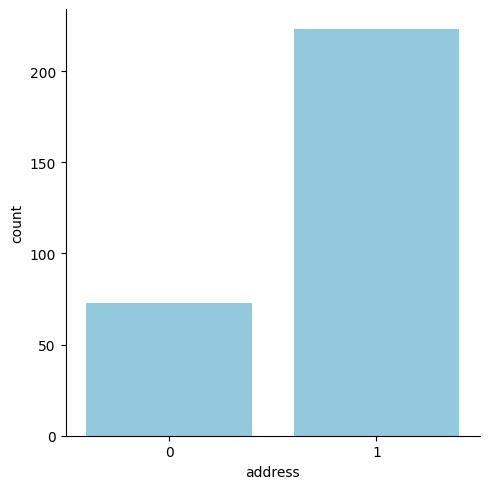

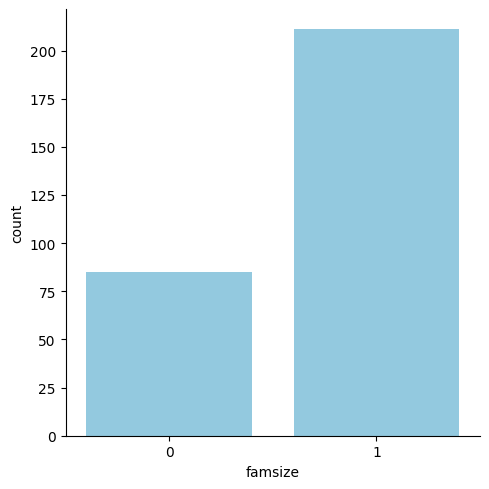

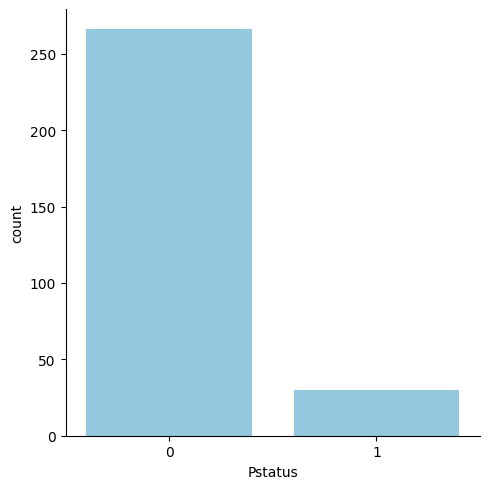

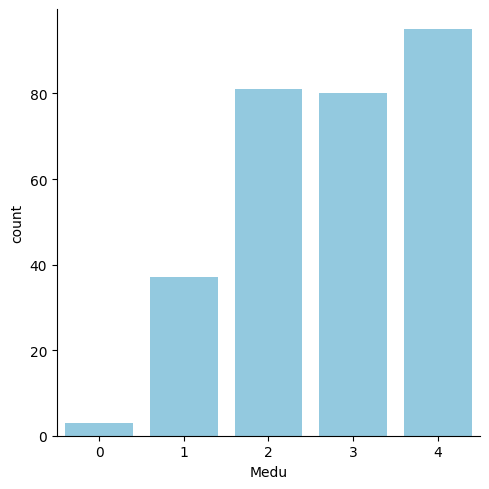

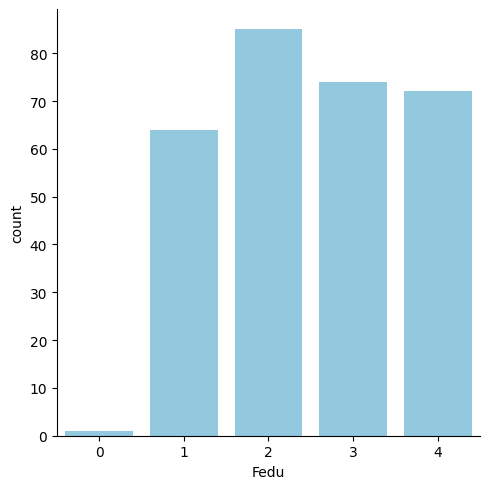

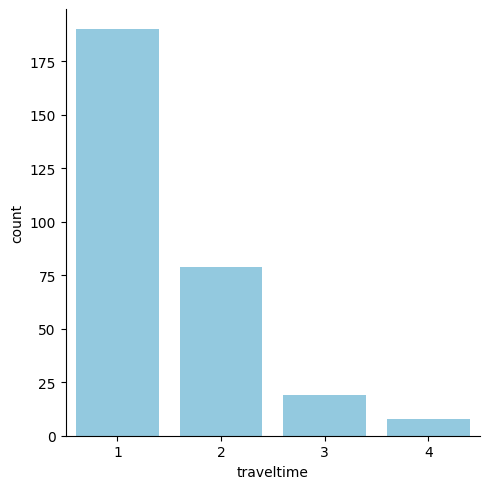

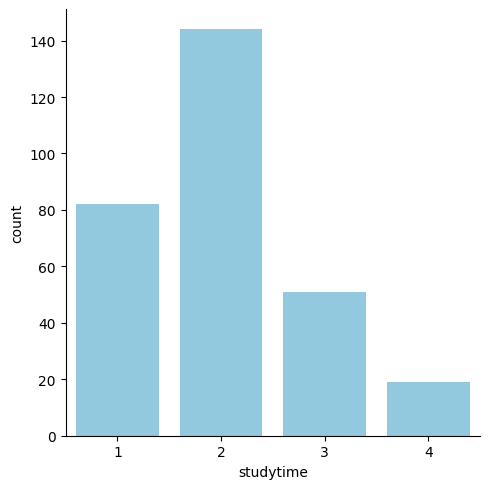

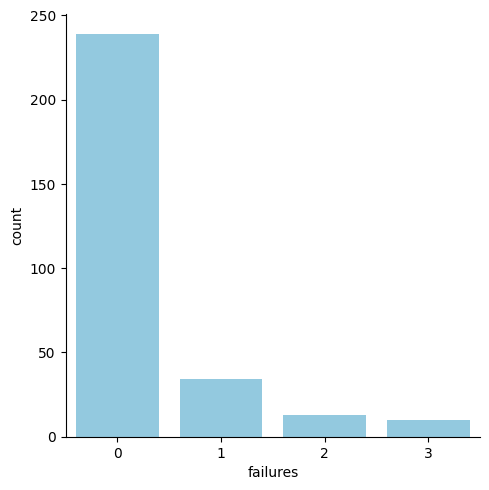

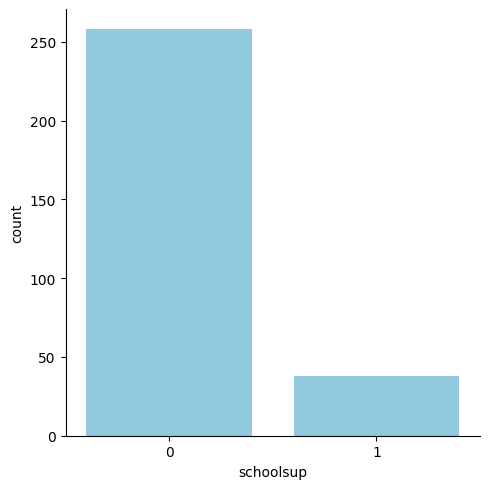

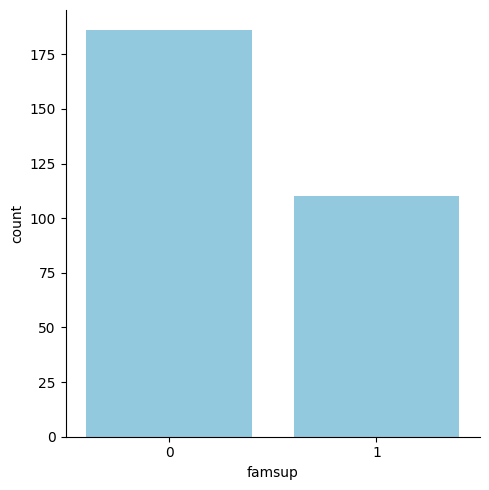

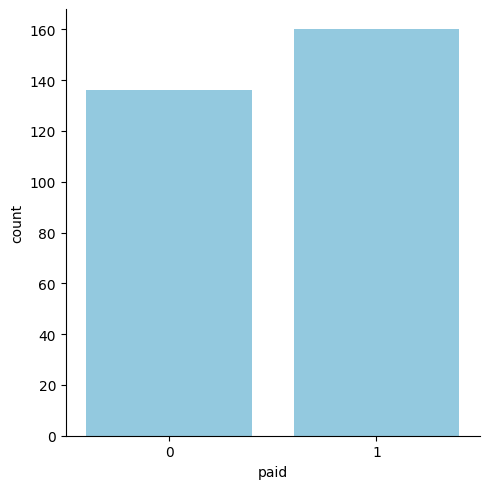

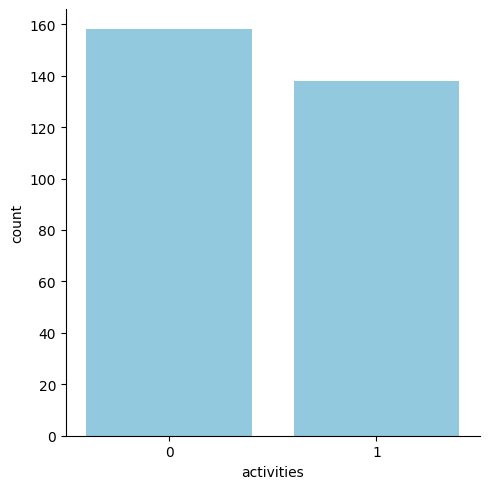

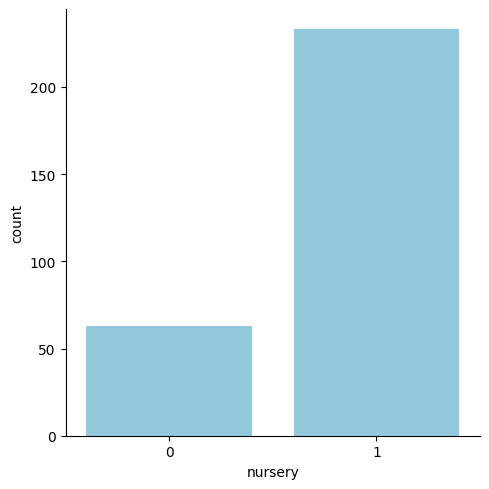

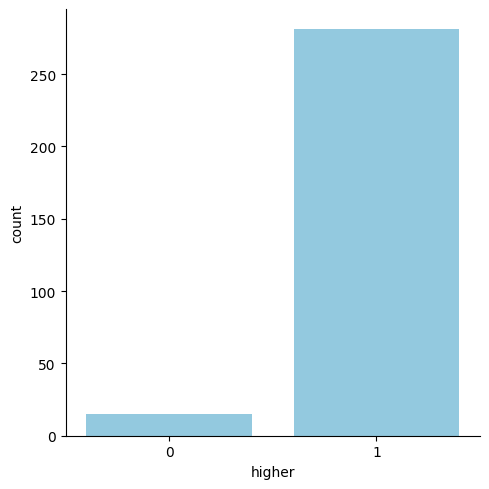

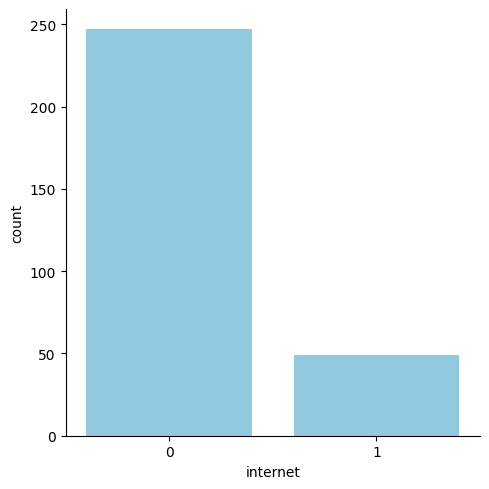

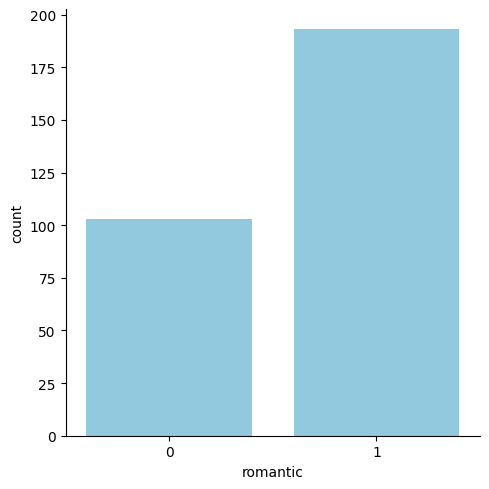

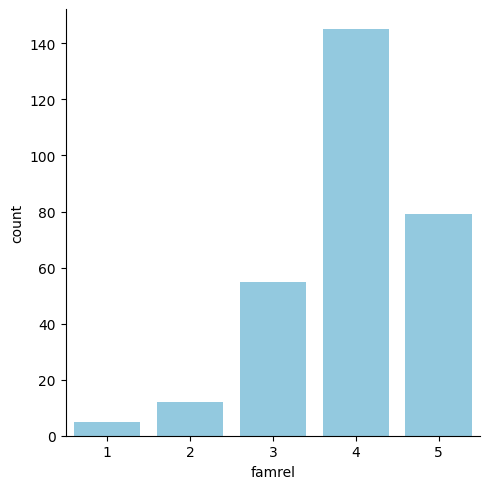

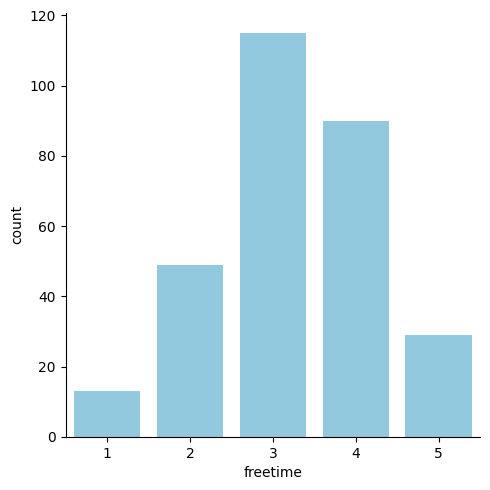

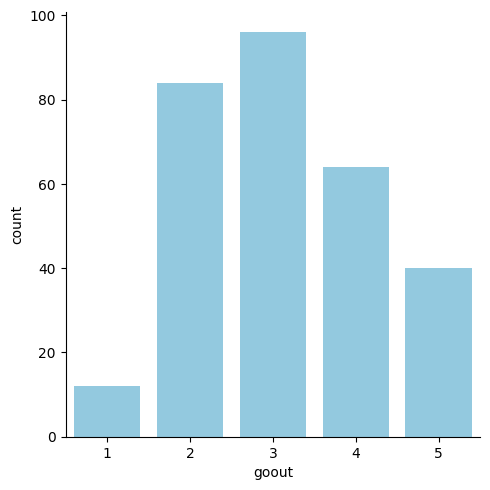

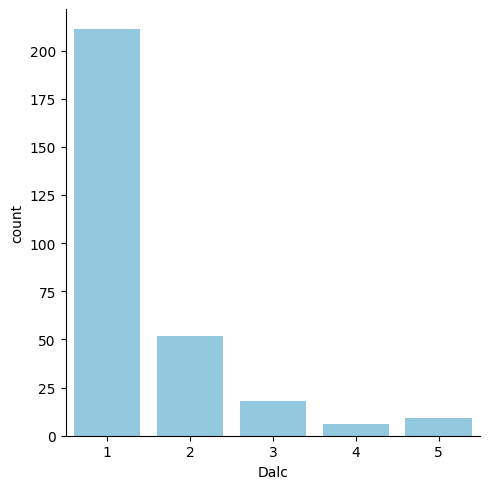

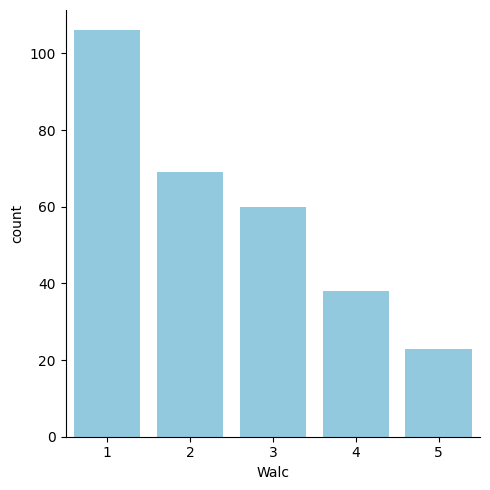

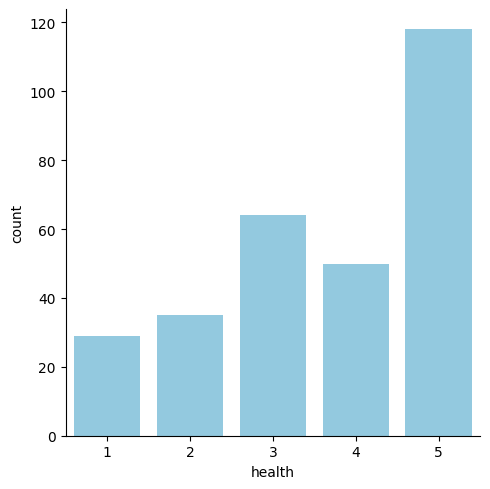

In [66]:
# barplots for categorical data to check the distrubations

import seaborn as sns 

for item in arithmetic:
    sns.catplot(x= item, data=X_train, kind='count', color='skyblue')

In [52]:
# it is visible imbalanced data for some features --> stratify = y in train_test

In [53]:
# TODO: Import any additional functionality you may need here
from sklearn.model_selection import train_test_split

# make target numeric
y = y.apply(lambda x: 0 if x == 'no' else 1)

# TODO: split the dataset into the number of training and testing
X_train, X_test, y_train, y_test = train_test_split(preprocess_features(X), y, stratify= y, test_size=0.25)
# X_test = None
# y_train = None
# y_test = None

*****binary*****
col name:  school----unique values:  ['GP' 'MS']
*****binary*****
col name:  sex----unique values:  ['F' 'M']
*****binary*****
col name:  address----unique values:  ['U' 'R']
*****binary*****
col name:  famsize----unique values:  ['GT3' 'LE3']
*****binary*****
col name:  Pstatus----unique values:  ['A' 'T']
*****categorical*****
col name:  Mjob----unique values:  ['at_home' 'health' 'other' 'services' 'teacher']
*****categorical*****
col name:  Fjob----unique values:  ['teacher' 'other' 'services' 'health' 'at_home']
*****categorical*****
col name:  reason----unique values:  ['course' 'other' 'home' 'reputation']
*****categorical*****
col name:  guardian----unique values:  ['mother' 'father' 'other']
*****binary*****
col name:  schoolsup----unique values:  ['yes' 'no']
*****binary*****
col name:  famsup----unique values:  ['no' 'yes']
*****binary*****
col name:  paid----unique values:  ['no' 'yes']
*****binary*****
col name:  activities----unique values:  ['no' 'yes']


<div style="margin-left: 10px;font-size:25px">
<p>f) In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in scikit-learn. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to training data and measure the F1 score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F1 score on the training set, and F1 score on the testing set.</p>
<p>The following supervised learning models are currently available in scikit-learn that you may choose from:</p>
    <ul>
        <li>Gaussian Naive Bayes (GaussianNB)</li>
        <li>K-Nearest Neighbors (KNeighbors)</li>
        <li>Stochastic Gradient Descent (SGDC)</li>
        <li>Support Vector Machines (SVM)</li>
        <li>Logistic Regression</li>
     </ul>
</div>    

In [54]:
# TODO
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

# the categorical data have been categorized already but we apply OneHoteEncder for categorical data
#  and scale up the numeric data by StandarScaler
numeric_columns = X_train.select_dtypes(include=['number']).columns
cat_columns = X_train.select_dtypes(include =['object', 'bool']).columns

preprocessing= ColumnTransformer([
    ('numeric', StandardScaler(), numeric_columns),
    ('categorical', OneHotEncoder(), cat_columns)
])

In [55]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [56]:
from sklearn.metrics import make_scorer, f1_score

f1_scorer = make_scorer(f1_score)

In [57]:
# KNeighbors

kn_model = make_pipeline(preprocessing, KNeighborsClassifier(n_neighbors=3))
kn_model.fit(X_train, y_train)
y_predict = kn_model.predict(X_train)
f1_score(y_predict, y_train)
# cross_val_score(kn_model, X_train, y_train, cv=3, scoring=f1_scorer)

0.8655256723716381

In [58]:
# GausianBM

gb_model = make_pipeline(preprocessing, GaussianNB())
# gb_model.fit(X_train, y_train)
cross_val_score(gb_model, X_test, y_test, cv=3)

array([0.51515152, 0.36363636, 0.45454545])

In [59]:
# SVC

svc_model = make_pipeline(preprocessing, SVC(kernel='linear'))

cross_val_score(svc_model, X_train, y_train, cv=3)

array([0.67676768, 0.67676768, 0.66326531])

In [60]:
# logistic regression

lgr_model = make_pipeline(preprocessing, LogisticRegression())
cross_val_score(lgr_model, X_train, y_train, cv=3)

array([0.64646465, 0.68686869, 0.63265306])

In [61]:
# stochastic gradient descent

sgd_model = make_pipeline(preprocessing, SGDClassifier())
cross_val_score(sgd_model, X_train, y_train, cv=3)

array([0.68686869, 0.66666667, 0.67346939])

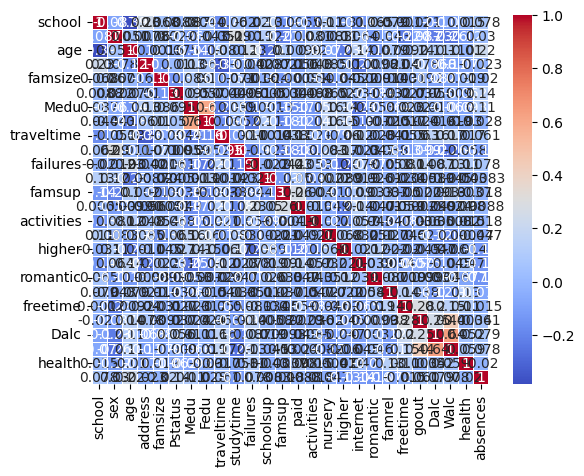

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X_train.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

In [64]:
# it is almost impossible to check the coorelations between features. Moreover, the target is binary
# so correlation with features will not provide any information

In [67]:
X_train.shape

(296, 43)